# Forest Fire Prediction

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Plot scatterplots and distributions of numerical features to see how they may affect the output 'area' For this, first we need to transform the outcome 'area' by taking its logarithm (after adding 1 to avoid zeros)



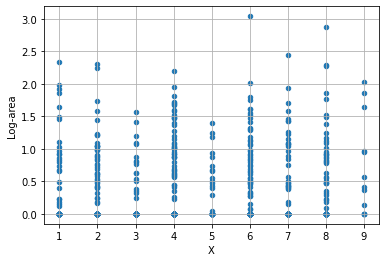

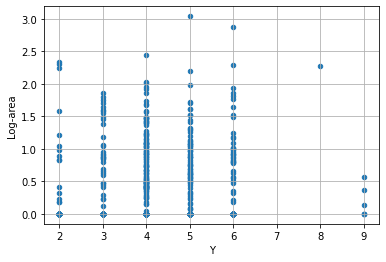

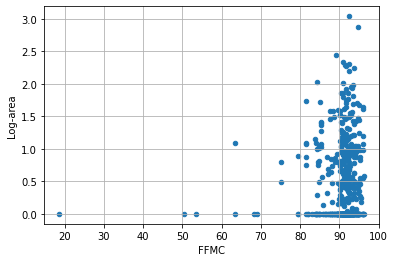

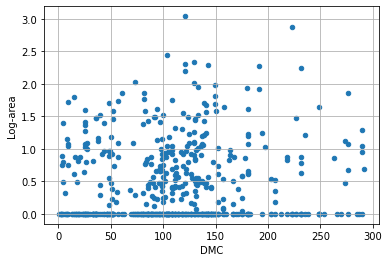

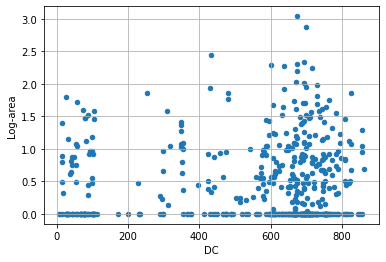

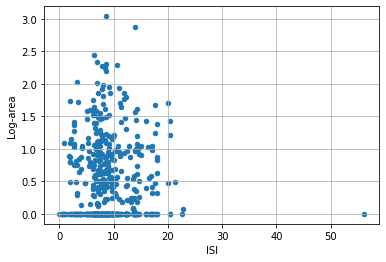

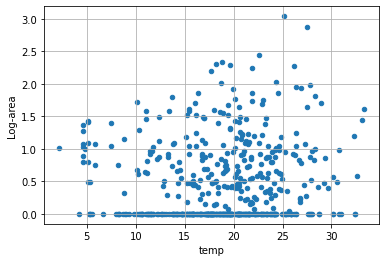

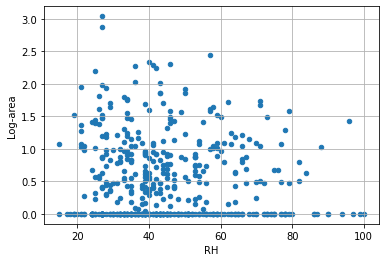

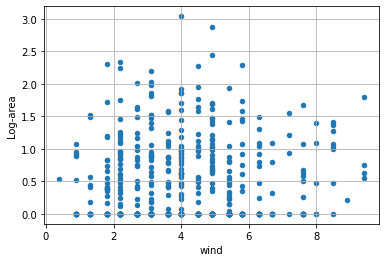

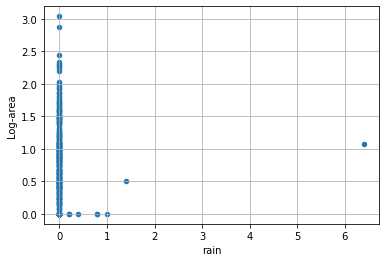

In [4]:
df['Log-area']=np.log10(df['area']+1)

for i in df.describe().columns[:-2]:
    df.plot.scatter(i,'Log-area',grid=True)

Plot boxplots of how the categorical features (month and day) affect the outcome

<AxesSubplot:title={'center':'Log-area'}, xlabel='day'>

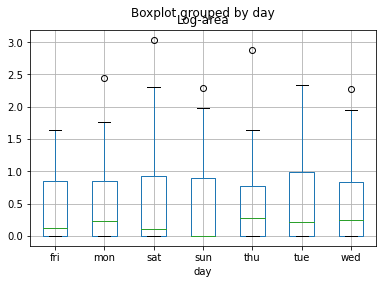

In [5]:
df.boxplot(column='Log-area',by='day')

<AxesSubplot:title={'center':'Log-area'}, xlabel='month'>

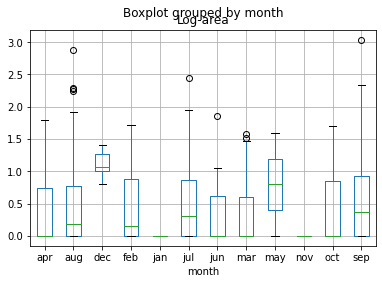

In [6]:
df.boxplot(column='Log-area',by='month')

Data pre-processing, test/train split, REC function

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [8]:
#Label encoder for the categorical feature (day and month)
enc = LabelEncoder()
enc.fit(df['month'])

LabelEncoder()

In [9]:
enc.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [10]:
df['month_encoded']=enc.transform(df['month'])
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7


In [11]:
enc.fit(df['day'])

LabelEncoder()

In [12]:
enc.classes_

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [13]:
df['day_encoded']=enc.transform(df['day'])
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded,day_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7,3
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0.0,1,3
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0.0,1,1
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0.0,1,1
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0.0,11,5
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0.0,11,2


In [14]:
test_size=0.2

In [15]:
X_data=df.drop(['area','Log-area','month','day'],axis=1)
y_data=df['Log-area']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

In [16]:
y_train=y_train.values.reshape(y_train.size,1)

Receiver Operating Characteristic (ROC) curves provide a powerful tool for visualizing and comparing classification results. Regression Error Characteristic (REC) curves generalize ROC curves to regression. 

In [17]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [18]:
# Define the max tolerance limit for REC curve x-axis
# For this problem this represents the absolute value of error in the prediction of the outcome i.e. area burned
tol_max=20

#### Gridsearch

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

#### Support Vector Regressor (SVR)

In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [20]:
scaler = StandardScaler()

In [21]:
# Parameter grid for the Grid Search
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [22]:
grid_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=5)
grid_SVR.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'epsilon': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [23]:
print("Best parameters obtained by Grid Search:",grid_SVR.best_params_)

Best parameters obtained by Grid Search: {'C': 0.01, 'epsilon': 1, 'kernel': 'rbf'}


In [24]:
a=grid_SVR.predict(X_test)
print("RMSE for Support Vector Regression:",np.sqrt(np.mean((y_test-a)**2)))

RMSE for Support Vector Regression: 0.6833102050307369


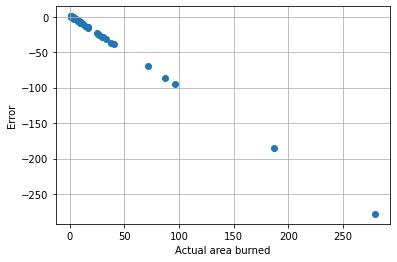

In [25]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  3.,  3.,  0.,  6., 12., 73.]),
 array([-277.93123803, -272.36063803, -266.79003803, -261.21943803,
        -255.64883803, -250.07823803, -244.50763803, -238.93703803,
        -233.36643803, -227.79583803, -222.22523803, -216.65463803,
        -211.08403803, -205.51343803, -199.94283803, -194.37223803,
        -188.80163803, -183.23103803, -177.66043803, -172.08983803,
        -166.51923803, -160.94863803, -155.37803803, -149.80743803,
        -144.23683803, -138.66623803, -133.09563803, -127.52503803,
        -121.95443803, -116.38383803, -110.81323803, -105.24263803,
         -99.67203803,  -94.10143803,  -88.53083803,  -82.96023803,
         -77.38963803,  -71.81903803,  -66.24843803,  -60.67783803,
         -55.10723803,  -49.53663803

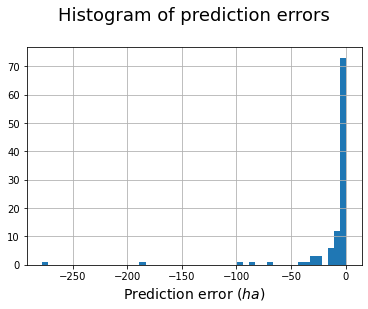

In [26]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

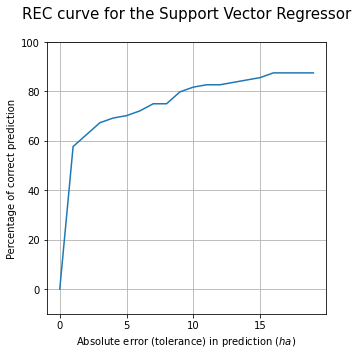

In [27]:
rec_SVR=[]
for i in range(tol_max):
    rec_SVR.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Support Vector Regressor\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)

#### Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree_model = DecisionTreeRegressor(max_depth=10,criterion='mae')
tree_model.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

DecisionTreeRegressor(criterion='mae', max_depth=10)

In [30]:
a=tree_model.predict(X_test)
print("RMSE for Decision Tree:",np.sqrt(np.mean((y_test-a)**2)))

RMSE for Decision Tree: 1.5389440039551683


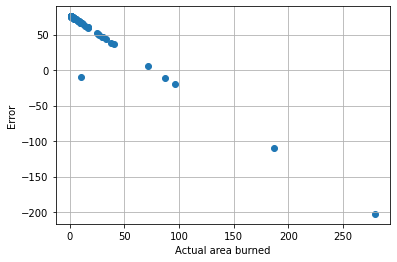

In [31]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  3.,  3.,  0.,  6., 11., 73.]),
 array([-202.59939227, -197.02879227, -191.45819227, -185.88759227,
        -180.31699227, -174.74639227, -169.17579227, -163.60519227,
        -158.03459227, -152.46399227, -146.89339227, -141.32279227,
        -135.75219227, -130.18159227, -124.61099227, -119.04039227,
        -113.46979227, -107.89919227, -102.32859227,  -96.75799227,
         -91.18739227,  -85.61679227,  -80.04619227,  -74.47559227,
         -68.90499227,  -63.33439227,  -57.76379227,  -52.19319227,
         -46.62259227,  -41.05199227,  -35.48139227,  -29.91079227,
         -24.34019227,  -18.76959227,  -13.19899227,   -7.62839227,
          -2.05779227,    3.51280773,    9.08340773,   14.65400773,
          20.22460773,   25.79520773

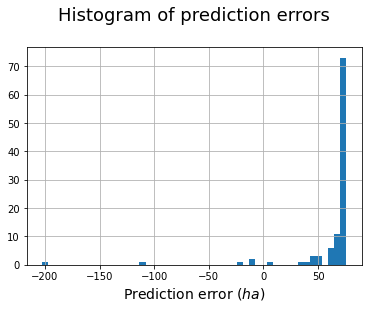

In [32]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

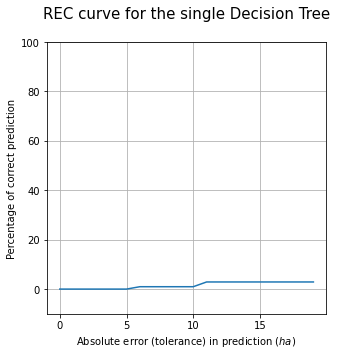

In [33]:
rec_DT=[]
for i in range(tol_max):
    rec_DT.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the single Decision Tree\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_DT)

#### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
param_grid = {'max_depth': [5,10,15,20,50], 'max_leaf_nodes': [2,5,10], 'min_samples_leaf': [2,5,10],
             'min_samples_split':[2,5,10]}
grid_RF = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=0,cv=5)
grid_RF.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [36]:
print("Best parameters obtained by Grid Search:",grid_RF.best_params_)

Best parameters obtained by Grid Search: {'max_depth': 20, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [37]:
a=grid_RF.predict(X_test)
rmse_rf=np.sqrt(np.mean((y_test-a)**2))
print("RMSE for Random Forest:",rmse_rf)

RMSE for Random Forest: 0.619539867005275


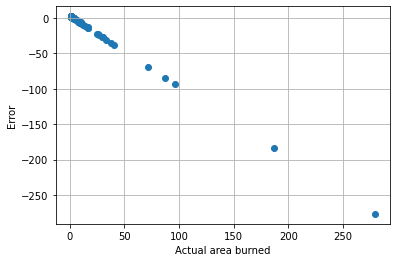

In [38]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  3.,  3.,  0.,  6., 13., 72.]),
 array([-276.80944371, -271.22068226, -265.63192081, -260.04315936,
        -254.45439791, -248.86563646, -243.27687501, -237.68811356,
        -232.09935211, -226.51059066, -220.92182921, -215.33306776,
        -209.74430632, -204.15554487, -198.56678342, -192.97802197,
        -187.38926052, -181.80049907, -176.21173762, -170.62297617,
        -165.03421472, -159.44545327, -153.85669182, -148.26793037,
        -142.67916892, -137.09040748, -131.50164603, -125.91288458,
        -120.32412313, -114.73536168, -109.14660023, -103.55783878,
         -97.96907733,  -92.38031588,  -86.79155443,  -81.20279298,
         -75.61403153,  -70.02527008,  -64.43650864,  -58.84774719,
         -53.25898574,  -47.67022429

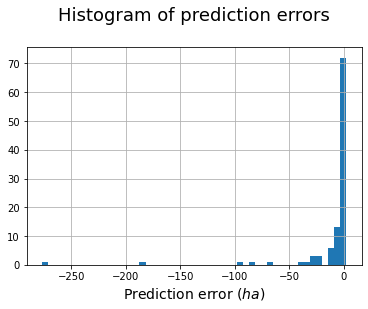

In [39]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

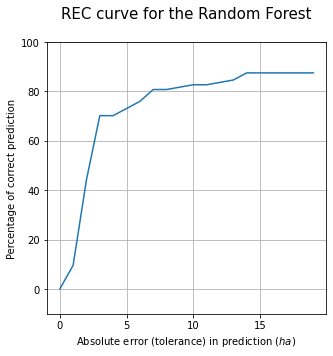

In [40]:
rec_RF=[]
for i in range(tol_max):
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_RF)

#### Deep network

In [41]:
from keras.models import Sequential
import keras.optimizers as opti
from keras.layers import Dense, Activation,Dropout

Using TensorFlow backend.


In [42]:
model = Sequential()
model.add(Dense(100, input_dim=12))
model.add(Activation('selu'))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Activation('selu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1300      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)               

In [43]:
learning_rate=0.001
optimizer = opti.RMSprop(lr=learning_rate)
model.compile(optimizer=optimizer,loss='mse')

In [44]:
data=X_train
target = y_train
model.fit(data, target, epochs=100, batch_size=10,verbose=0)

In [45]:
a=model.predict(X_test)
print("RMSE for Deep Network:",np.sqrt(np.mean((y_test-a.reshape(a.size,))**2)))

RMSE for Deep Network: 0.6242937540979029


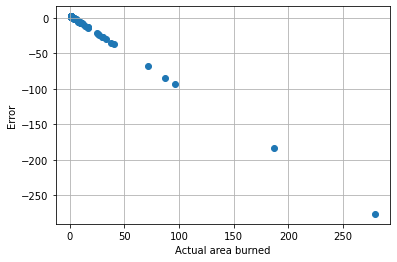

In [46]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a.reshape(a.size,))-10**(y_test))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  3.,  3.,  0.,  6., 12., 73.]),
 array([-276.14919069, -270.57687532, -265.00455995, -259.43224459,
        -253.85992922, -248.28761385, -242.71529848, -237.14298311,
        -231.57066774, -225.99835237, -220.426037  , -214.85372163,
        -209.28140626, -203.70909089, -198.13677552, -192.56446015,
        -186.99214479, -181.41982942, -175.84751405, -170.27519868,
        -164.70288331, -159.13056794, -153.55825257, -147.9859372 ,
        -142.41362183, -136.84130646, -131.26899109, -125.69667572,
        -120.12436035, -114.55204499, -108.97972962, -103.40741425,
         -97.83509888,  -92.26278351,  -86.69046814,  -81.11815277,
         -75.5458374 ,  -69.97352203,  -64.40120666,  -58.82889129,
         -53.25657592,  -47.68426055

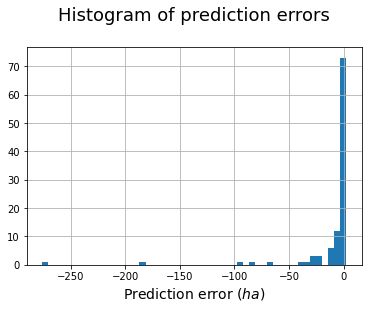

In [47]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

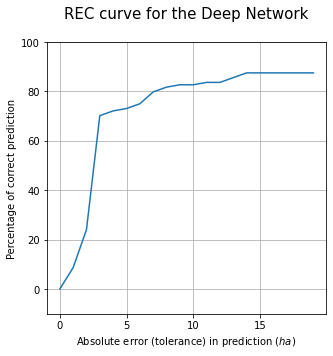

In [48]:
rec_NN=[]
for i in range(tol_max):
    rec_NN.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Deep Network\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_NN)

#### Relative performance of various models (REC curves)

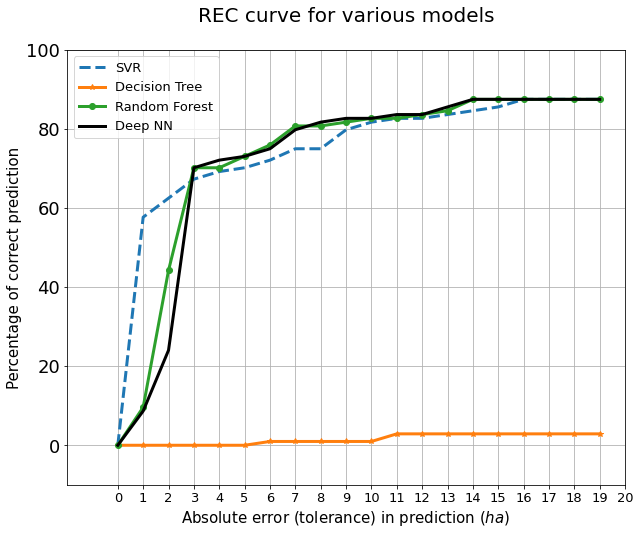

In [49]:
plt.figure(figsize=(10,8))
plt.title("REC curve for various models\n",fontsize=20)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)",fontsize=15)
plt.ylabel("Percentage of correct prediction",fontsize=15)
plt.xticks([i for i in range(0,tol_max+1,1)],fontsize=13)
plt.ylim(-10,100)
plt.xlim(-2,tol_max)
plt.yticks([i*20 for i in range(6)],fontsize=18)
plt.grid(True)
plt.plot(range(tol_max),rec_SVR,'--',lw=3)
plt.plot(range(tol_max),rec_DT,'*-',lw=3)
plt.plot(range(tol_max),rec_RF,'o-',lw=3)
plt.plot(range(tol_max),rec_NN,'k-',lw=3)
plt.legend(['SVR','Decision Tree','Random Forest','Deep NN'],fontsize=13)